In [1]:
from argparse import Namespace
from prafa.universe import Universe
from prafa.portfolio import Portfolio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pickle
from datetime import datetime
from dateutil.relativedelta import relativedelta

Ipopt 3.14.17: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:      500
Number of nonzeros in inequality constraint Jacobian.:      500
Number of nonzeros in Lagrangian Hessian.............:   125250

Total number of variables............................:      500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      500
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number

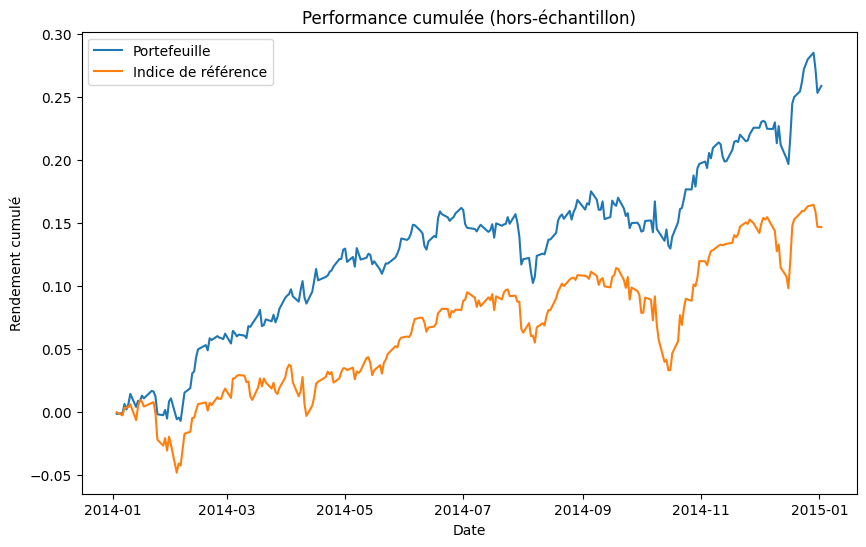

In [2]:
args = Namespace()
args.index = 'sp500'
args.data_path = 'financial_data'
args.result_path = 'results'
args.solution_name = 'lagrange_ours_m'
args.rebalancing = 3
args.cardinality = 30
args.start_date = '2014-01-02'
args.end_date = '2025-01-02'

# Initialiser l'objet Universe
universe = Universe(args)
portfolio = Portfolio(universe)
weights = portfolio.rebalance_portfolio(pd.Timestamp("2011-01-02"), pd.Timestamp("2014-01-02"))

test_start  = pd.Timestamp("2014-01-03")
test_end = pd.Timestamp("2015-01-03")

# Extraire rendements entre deux rebalancements
universe.new_universe(test_start, test_end, training=False)
X_test = universe.get_stocks_returns()
Y_test = universe.get_index_returns()


rendements_portefeuille = list(X_test @ weights)
rendements_indice = list(Y_test)
index_dates = list(X_test.index)

# Construire les séries temporelles
rendements_portefeuille = pd.Series(rendements_portefeuille, index=index_dates)
rendements_indice = pd.Series(rendements_indice, index=index_dates)

# Cumuler les rendements
rendements_cumules_portefeuille = (rendements_portefeuille + 1).cumprod() -1
rendements_cumules_indice = (rendements_indice + 1).cumprod() - 1

# Tracer
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer les deux courbes
plt.plot(rendements_cumules_portefeuille, label="Portefeuille")
plt.plot(rendements_cumules_indice, label="Indice de référence")

# Ajouter des titres et des labels
plt.title("Performance cumulée (hors-échantillon)")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")

# Afficher la légende et la grille
plt.legend()

# Afficher le graphique
plt.show()

In [3]:
compteur = 0
for i in weights:
    if i > 0:
        compteur += 1
        print(i)

print('\n \n \n')
print(compteur)
print(np.sum(weights))

0.027705834709932643
0.02813670835752727
0.027939337917133485
0.02815902491924579
0.02760424653438513
0.02768561676823646
0.028054182102047645
0.027599861647170223
0.027655264825361434
0.027668106233893732
0.027907371680573487
0.027662879571020423
0.027682549626643557
0.028052444370260218
0.02759612457316145
0.02766896612221268
0.02802752026872457
0.02798119468932309
0.027947807500058326
0.027603203732314764
0.027265213118473346
0.02792396451206858
0.027625374555124486
0.027347875614280853
0.027687390505193633
0.02744682330609656
0.027931708804624335
0.027961738935869035
0.0277569101852675
0.027931621400078405
0.02817821440615213
0.0276766397809058
0.027566688376418267
0.02809732727669594
0.027626135592173917
0.027642767386726927

 
 

36
1.0000046399053761


In [12]:
filepath = 'results/portfolio_sp500_lagrange_ours_30.json'
with open(filepath, 'rb') as f:
    portfolios = pickle.load(f)


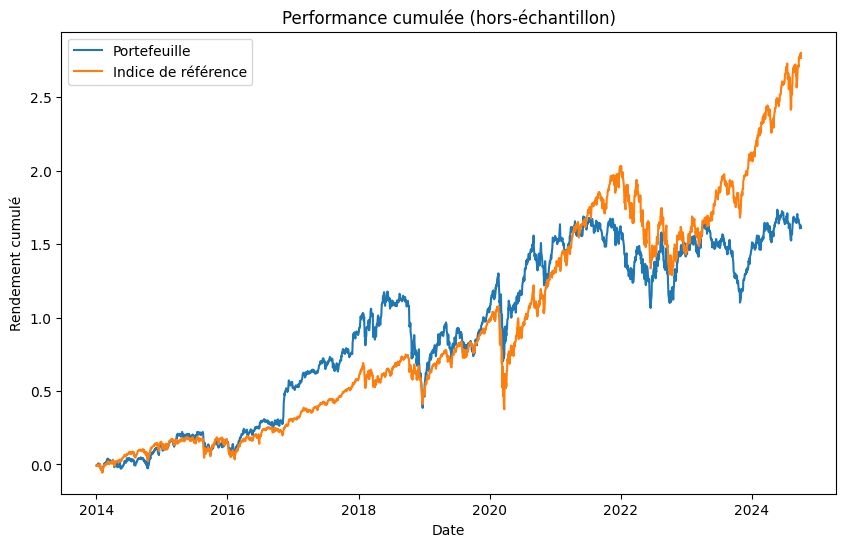

In [ ]:

args = Namespace()
args.index = 'sp500'
args.data_path = 'financial_data'
args.result_path = 'results'
args.solution_name = 'lagrange_ours'
args.rebalancing = 3
args.start_date = '2014-01-02'
args.end_date = '2025-01-02'

# Initialiser l'objet Universe
universe = Universe(args)


# S'assurer que les dates sont ordonnées
dates = list(portfolios.keys())
n = len(dates)

rendements_portefeuille = []
rendements_indice = []
index_dates = []

for i in range(n - 1):  # On va jusqu'à n-1 car on a besoin de t et t+1
    start_date = dates[i]
    end_date = dates[i + 1] - pd.tseries.offsets.BDay(1)  # veille du prochain rebalance

    # Extraire rendements entre deux rebalancements
    universe.new_universe(start_date, end_date, training=False)
    X_test = universe.get_stocks_returns()
    Y_test = universe.get_index_returns()
    weights = portfolios[start_date]

    
    rendements_portefeuille += list(X_test @ weights)
    rendements_indice += list(Y_test)
    index_dates += list(X_test.index)

# Construire les séries temporelles
rendements_portefeuille = pd.Series(rendements_portefeuille, index=index_dates)
rendements_indice = pd.Series(rendements_indice, index=index_dates)

# Cumuler les rendements
rendements_cumules_portefeuille = (rendements_portefeuille + 1).cumprod() -1
rendements_cumules_indice = (rendements_indice + 1).cumprod() - 1

# Tracer
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer les deux courbes
plt.plot(rendements_cumules_portefeuille, label="Portefeuille")
plt.plot(rendements_cumules_indice, label="Indice de référence")

# Ajouter des titres et des labels
plt.title("Performance cumulée (hors-échantillon)")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")

# Afficher la légende et la grille
plt.legend()

# Afficher le graphique
plt.show()
